In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
from sklearn import linear_model as lm
import math

In [2]:
ds = pd.read_csv('house_prices.csv')
ds = ds.drop({'Title','Description','location','Status','Floor','Transaction','Furnishing','facing','overlooking','Super Area','Dimensions','Plot Area','Society','Ownership','Car Parking','Amount(in rupees)'},axis = 'columns')
ds = ds[(ds['Carpet Area'].str.contains('sqft') )==1]
ds['Carpet Area'] = pd.to_numeric(ds['Carpet Area'].str.replace(' sqft',''))
AreaMean = ds['Carpet Area'].mean()
AreaMean = math.floor(AreaMean)
ds['Carpet Area'] = ds['Carpet Area'].fillna(AreaMean)

PriceMean = ds['Price (in rupees)'].mean()
ds['Price (in rupees)'] = ds['Price (in rupees)'].fillna(math.floor(PriceMean))

# Balcony
ds['Balcony'] = ds['Balcony'].str.extract(r'(\d+)').astype(float)
BalconyMean = ds['Balcony'].mean()
ds['Balcony'] = ds['Balcony'].fillna(math.floor(BalconyMean))

# Balcony
ds['Bathroom'] = ds['Bathroom'].str.extract(r'(\d+)').astype(float)
BathroomMean = ds['Bathroom'].mean()
ds['Bathroom'] = ds['Bathroom'].fillna(math.floor(BathroomMean))

ds = ds.dropna()
print(ds.shape)
ds.head(10)



(93841, 5)


,Index,Price (in rupees),Carpet Area,Bathroom,Balcony
0,0.0,6000.0,500,1.0,2.0
1,1.0,13799.0,473,2.0,2.0
2,2.0,17500.0,779,2.0,2.0
3,3.0,8280.0,530,1.0,1.0
4,4.0,18824.0,635,2.0,2.0
6,6.0,2538.0,550,1.0,2.0
9,9.0,11150.0,900,3.0,1.0
10,10.0,12174.0,950,2.0,2.0
13,13.0,17526.0,1820,4.0,1.0
15,15.0,10000.0,675,2.0,1.0


In [3]:
ds = ds.drop('Index',axis = 1)

In [4]:
'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(ds[['Price (in rupees)']])
ds['Price (in rupees)'] = scaler.transform(ds[['Price (in rupees)']])

scaler.fit(ds[['Carpet Area']])
ds['Carpet Area'] = scaler.transform(ds[['Carpet Area']])

scaler.fit(ds[['Bathroom']])
ds['Bathroom'] = scaler.transform(ds[['Bathroom']])

scaler.fit(ds[['Balcony']])
ds['Balcony'] = scaler.transform(ds[['Balcony']])'''

"from sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\n\nscaler.fit(ds[['Price (in rupees)']])\nds['Price (in rupees)'] = scaler.transform(ds[['Price (in rupees)']])\n\nscaler.fit(ds[['Carpet Area']])\nds['Carpet Area'] = scaler.transform(ds[['Carpet Area']])\n\nscaler.fit(ds[['Bathroom']])\nds['Bathroom'] = scaler.transform(ds[['Bathroom']])\n\nscaler.fit(ds[['Balcony']])\nds['Balcony'] = scaler.transform(ds[['Balcony']])"

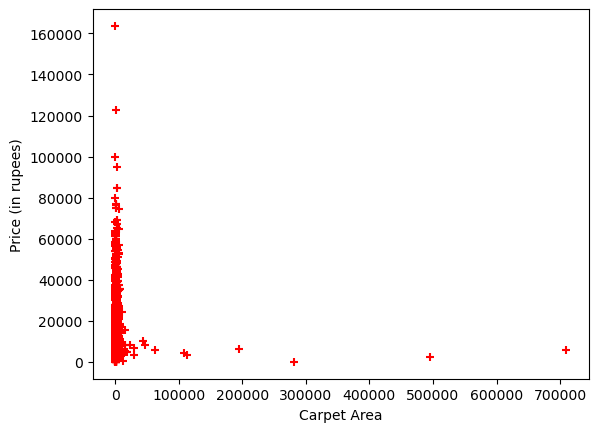

In [5]:
%matplotlib inline
mpl.xlabel('Carpet Area')
mpl.ylabel('Price (in rupees)')
mpl.scatter(ds['Carpet Area'],ds['Price (in rupees)'], color = 'red', marker = '+')

In [6]:
ds = ds[ds['Carpet Area'] <= 10000]
ds.head()

,Price (in rupees),Carpet Area,Bathroom,Balcony
0,6000.0,500,1.0,2.0
1,13799.0,473,2.0,2.0
2,17500.0,779,2.0,2.0
3,8280.0,530,1.0,1.0
4,18824.0,635,2.0,2.0


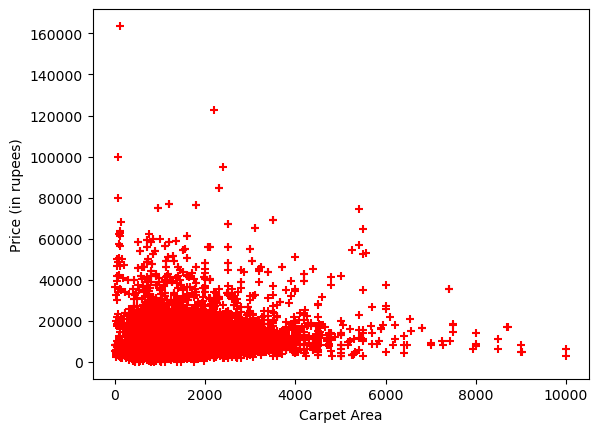

In [7]:
%matplotlib inline
mpl.xlabel('Carpet Area')
mpl.ylabel('Price (in rupees)')
mpl.scatter(ds['Carpet Area'],ds['Price (in rupees)'], color = 'red', marker = '+')

In [8]:
mean = ds['Carpet Area'].mean()
std_dev = ds['Carpet Area'].std()

threshold = 3

# Filter out outliers
ds = ds[(ds['Carpet Area'] >= mean - threshold * std_dev) & (ds['Carpet Area'] <= mean + threshold * std_dev)]

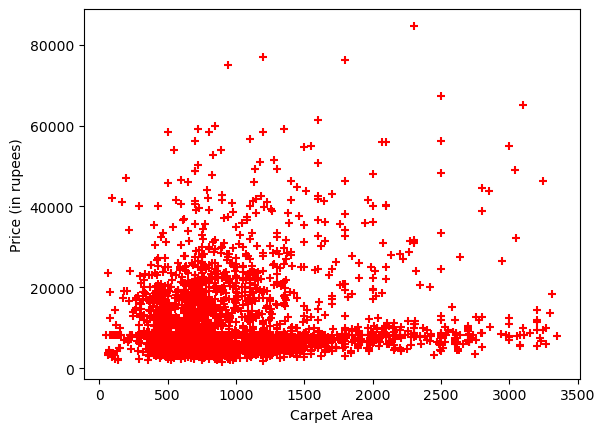

In [28]:
%matplotlib inline
mpl.xlabel('Carpet Area')
mpl.ylabel('Price (in rupees)')
mpl.scatter(ds['Carpet Area'][:5000],ds['Price (in rupees)'][:5000], color = 'red', marker = '+')

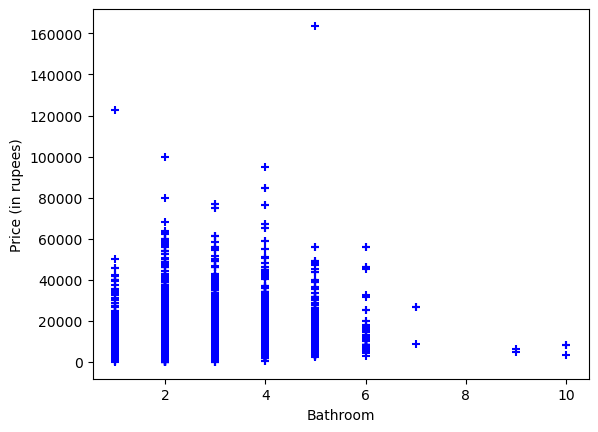

In [10]:
%matplotlib inline
mpl.xlabel('Bathroom')
mpl.ylabel('Price (in rupees)')
mpl.scatter(ds['Bathroom'],ds['Price (in rupees)'], color = 'blue', marker = '+')

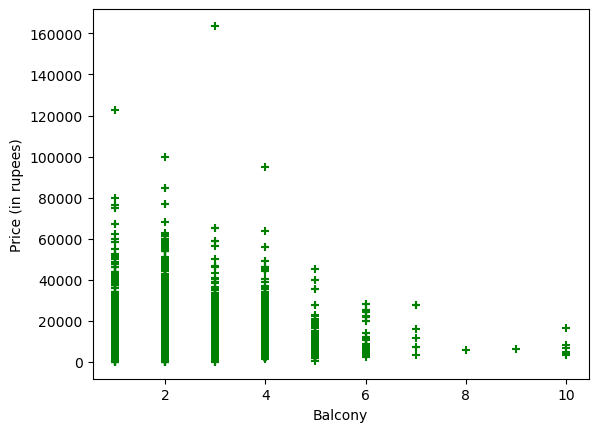

In [11]:
%matplotlib inline
mpl.xlabel('Balcony')
mpl.ylabel('Price (in rupees)')
mpl.scatter(ds['Balcony'],ds['Price (in rupees)'], color = 'green', marker = '+')

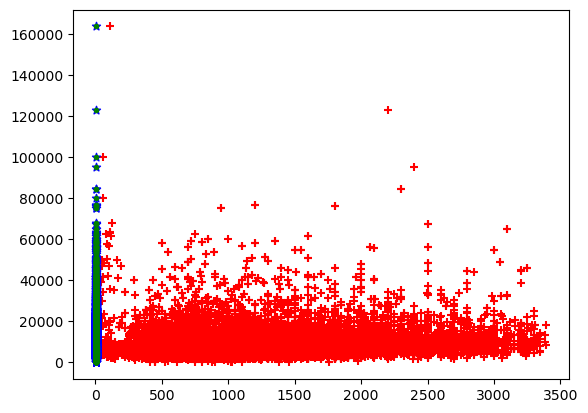

In [12]:
mpl.scatter(ds['Carpet Area'],ds['Price (in rupees)'], color = 'red', marker = '+')
mpl.scatter(ds['Bathroom'],ds['Price (in rupees)'], color = 'blue', marker = '*')
mpl.scatter(ds['Balcony'],ds['Price (in rupees)'], color = 'green', marker = '.')

In [13]:
X = ds[['Carpet Area','Bathroom','Balcony']]
y = ds['Price (in rupees)']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.2)

In [15]:
model = lm.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
model.score(X_test,y_test)

0.12077827409876951

In [17]:
model.score(X_train,y_train)

0.11907323148377091

In [18]:
model2 = lm.Lasso()
model2.fit(X_train, y_train)

Lasso()

In [19]:
model2.score(X_test,y_test)

0.12077689631334143

In [20]:
model2.score(X_train, y_train)

0.11907301741004306

In [21]:
model3 = lm.Ridge()
model3.fit(X_train, y_train)

Ridge()

In [22]:
model3.score(X_test,y_test)

0.1207782512481621

In [23]:
model3.score(X_train, y_train)

0.11907323043417917

In [24]:
model4 = lm.LogisticRegression()
model4.fit(X_train, y_train)

C:\Users\AUC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
model4.score(X_test,y_test)

0.1167938199400074